In [1]:
from yamlscript_histdata import histdata_parser
import mplhep as hep
import matplotlib.pyplot as plt
import pandas as pd
import boost_histogram as bh
import numpy as np

In [2]:
df1, df2 = histdata_parser("CR_ttc_prefit.yaml")

histdata_parser ran in 0.054297070018947124 seconds.


In [7]:
df1

Yield
        Name                                                                   
Samples tH                    [0.6777518379661686, 0.48202515103252475, 0.32...
        tWH                   [0.8611041195955744, 0.6849249457636786, 0.565...
        t#bar{t} + #geq1b     [1733.5952230273672, 1459.7220791327006, 1243....
        t#bar{t} + #geq1c     [1030.6650788589109, 1121.9675875571738, 1081....
        t#bar{t} + light      [1812.3554490930073, 1868.11989264379, 2284.18...
        t#bar{t} + H          [48.60518250639442, 40.04067687374472, 37.1956...
        t#bar{t} + Z          [26.39513222502811, 25.891754372557813, 23.170...
        t#bar{t} + W          [9.097638901211637, 9.221123801814636, 9.66502...
        tZq                   [3.0064648700008876, 2.4274298712699505, 1.887...
        tWZ                   [0.04788054892440356, 0.09976182831975486, 0.1...
        Single top Wt         [175.14497458907522, 148.07426668913155, 121.2...
        Single top t-channel  [60.565403275077784, 52.22631627470051, 33.653...
        Single top s-channel  [5.066621098451062, 2.918603468951397, 3.05051...
        W+jets                [77.94189126565779, 69.54620984482469, 53.5506...
        Z+jets                [15.871487030187941, 11.83468536999561, 8.4767...
        VV                    [6.323578172776456, 4.3221632420960905, 3.2804...
        other Higgs           [9.9999775265841e-07, 0.7665413752105269, 0.75...
        Rare top              [2.836732332314187, 2.9287473492684235, 2.3056...
        Non-prompt            [84.95362873515114, 76.8663441981189, 82.05425...
Total   Yield                 [5094.011223487095, 4898.141133990464, 4989.95...
        UncertaintyUp         [827.5826665452911, 805.426846012266, 826.1614...
        UncertaintyDown       [-827.5826665452911, -805.426846012266, -826.1...
Data    Yield                 [5417, 5168, 5474, 5419, 5314, 5398, 5337, 544...

In [9]:
values = df1.loc[['Samples'], 'Yield'][2]
edges = df2.loc[['BinEdges'], 0][0]

centres = 0.5*(np.array(edges[1:]) + np.array(edges[:-1]))

In [6]:
values

[0.6777518379661686,
 0.48202515103252475,
 0.32095558377219036,
 0.36354299180894417,
 0.2666929262006992,
 0.2595304332772785,
 0.09246441180020554,
 1e-06,
 0.08984486815595626,
 0.1356263388970928]

[StepArtists(step=<matplotlib.lines.Line2D object at 0x7f545d385a90>, errorbar=None, legend_artist=None)]

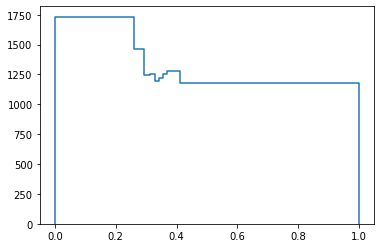

In [10]:
histogram = bh.Histogram(bh.axis.Variable(edges))
histogram.fill(centres, weight=values)

hep.histplot(histogram)

# canvas.plot(<mpl_hist>)